In [1]:
#Import necessary Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#load the data
df = pd.read_csv("C:/Users/sohra/OneDrive/Desktop/Statistics/12-31-2020.csv")

In [3]:
#display the first 6 rows of the raw data
df.head(6)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-01 05:23:07,33.93911,67.709953,51526,2191,41727,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-01 05:23:07,41.15330,20.168300,58316,1181,33634,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-01 05:23:07,28.03390,1.659600,99610,2756,67127,29727.0,Algeria,227.155372,2.766790
3,NaN,NaN,NaN,Andorra,2021-01-01 05:23:07,42.50630,1.521800,8049,84,7432,533.0,Andorra,10417.394681,1.043608
4,NaN,NaN,NaN,Angola,2021-01-01 05:23:07,-11.20270,17.873900,17553,405,11044,6104.0,Angola,53.407342,2.307298
5,NaN,NaN,NaN,Antigua and Barbuda,2021-01-01 05:23:07,17.06080,-61.796400,159,5,148,6.0,Antigua and Barbuda,162.364186,3.144654


In [4]:
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [5]:
# drop the unnecessary columns
df.drop(['FIPS', 'Admin2', 'Province_State','Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'], axis=1, inplace=True)
df.head(5)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2021-01-01 05:23:07,33.93911,67.709953,51526,2191,41727,0.0
1,Albania,2021-01-01 05:23:07,41.15330,20.168300,58316,1181,33634,23501.0
2,Algeria,2021-01-01 05:23:07,28.03390,1.659600,99610,2756,67127,29727.0
3,Andorra,2021-01-01 05:23:07,42.50630,1.521800,8049,84,7432,533.0
4,Angola,2021-01-01 05:23:07,-11.20270,17.873900,17553,405,11044,6104.0


In [6]:
#rename columns and first 6 rows of the filtered dataframe 
df.rename(columns={'Country_Region': "Country",'Last_Update':"Date" }, inplace=True)
df.head(6)

,Country,Date,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2021-01-01 05:23:07,33.93911,67.709953,51526,2191,41727,0.0
1,Albania,2021-01-01 05:23:07,41.15330,20.168300,58316,1181,33634,23501.0
2,Algeria,2021-01-01 05:23:07,28.03390,1.659600,99610,2756,67127,29727.0
3,Andorra,2021-01-01 05:23:07,42.50630,1.521800,8049,84,7432,533.0
4,Angola,2021-01-01 05:23:07,-11.20270,17.873900,17553,405,11044,6104.0
5,Antigua and Barbuda,2021-01-01 05:23:07,17.06080,-61.796400,159,5,148,6.0


In [7]:
#display the last last 6 filtered data
df.tail(6)

,Country,Date,Lat,Long_,Confirmed,Deaths,Recovered,Active
3970,Venezuela,2021-01-01 05:23:07,6.423800,-66.589700,113558,1028,107583,4947.0
3971,Vietnam,2021-01-01 05:23:07,14.058324,108.277199,1465,35,1325,105.0
3972,West Bank and Gaza,2021-01-01 05:23:07,31.952200,35.233200,138004,1400,117183,19421.0
3973,Yemen,2021-01-01 05:23:07,15.552727,48.516388,2099,610,1394,95.0
3974,Zambia,2021-01-01 05:23:07,-13.133897,27.849332,20725,388,18660,1677.0
3975,Zimbabwe,2021-01-01 05:23:07,-19.015438,29.154857,13867,363,11250,2254.0


In [8]:
import warnings
warnings.simplefilter(action= 'ignore',category=FutureWarning)

In [9]:
#group together data
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head(6)

,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,51526,0.0,41727,2191
1,Albania,58316,23501.0,33634,1181
2,Algeria,99610,29727.0,67127,2756
3,Andorra,8049,533.0,7432,84
4,Angola,17553,6104.0,11044,405
5,Antigua and Barbuda,159,6.0,148,5


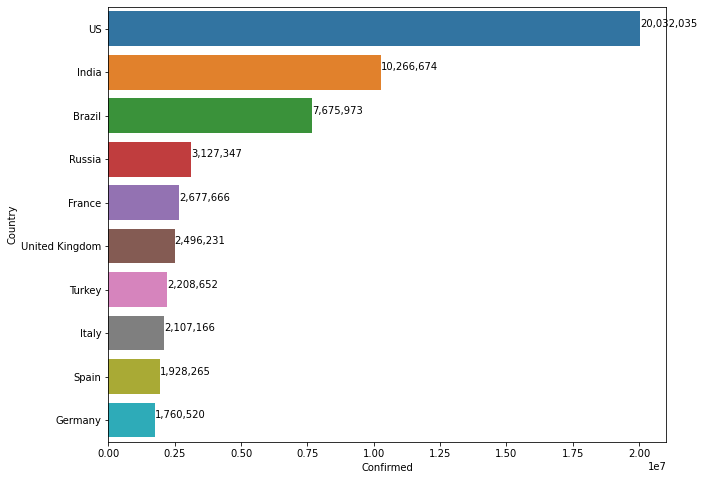

In [10]:
#Plot top 10 countries with maximum number of confirmed cases
top_10 = world.sort_values(by=['Confirmed'], ascending=False).head(10)

# Generate a Barplot
plt.figure(figsize=(10,8))
plot = sns.barplot(top_10['Confirmed'], top_10['Country'])
for i,(value,name) in enumerate(zip(top_10['Confirmed'],top_10['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()


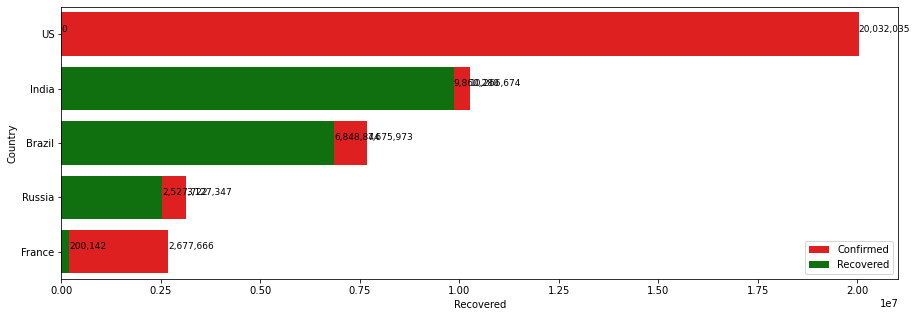

In [11]:
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()

# Generate a Barplot
plt.figure(figsize=(15,5))
confirmed = sns.barplot(top_5['Confirmed'], top_5['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(top_5['Recovered'], top_5['Country'], color = 'green', label='Recovered')

# Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
    recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

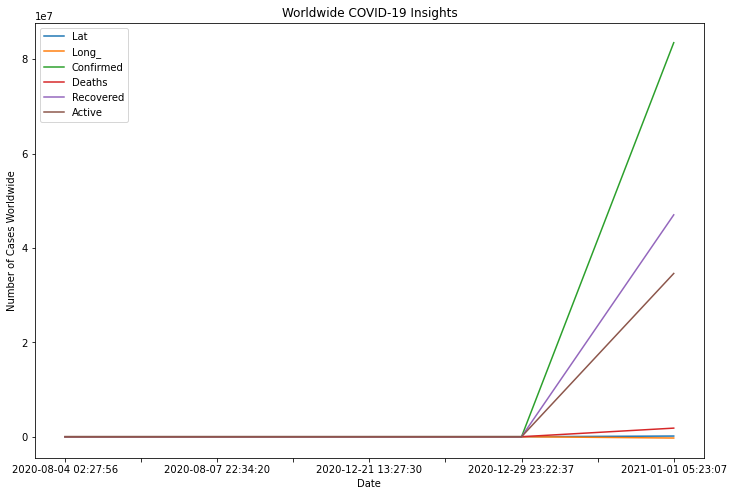

In [12]:
worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(12, 8))
w.set_xlabel('Date')
w.set_ylabel('Number of Cases Worldwide')
w.title.set_text('Worldwide COVID-19 Insights')

plt.show()